In [ ]:
import torch
import torch.nn.functional as F
from sklearn.datasets import make_blobs
from torch import nn, optim

import matplotlib.pyplot as plt
import numpy as np

# 경사하강법 

In [ ]:
x = torch.tensor([1,2,3]).float()
y = torch.tensor([ -2.1, -4.3, -6.9  ]).float()

w = 2
cost = torch.mean((w*x - y) **2)
print(cost)

w = 1
cost = torch.mean((w*x - y) **2)
print(cost)

w = 1.1
cost = torch.mean((w*x - y) **2)
print(cost)



tensor(84.0367)
tensor(49.1033)
tensor(52.1767)


[tensor(280.8367), tensor(213.1033), tensor(154.7033), tensor(105.6367), tensor(65.9033), tensor(35.5033), tensor(14.4367), tensor(2.7033), tensor(0.3033), tensor(7.2367), tensor(23.5033), tensor(49.1033), tensor(84.0367), tensor(128.3033), tensor(181.9033), tensor(244.8367), tensor(317.1033), tensor(398.7033), tensor(489.6366), tensor(589.9034)]


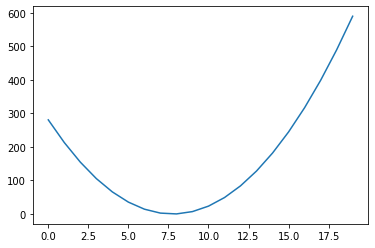

In [ ]:
c = []
for w  in range(-10, 10) :
    cost = ((w*x - y) **2).mean()
    c.append(cost)
print(c)

plt.plot(c)

In [ ]:
x = torch.tensor([1, 2, 3]).float()
y = torch.tensor([ 2, 4, 6  ]).float()

w = -50   
alpha = 0.1

d = ((w*x - y)*x).mean()
w = w - alpha * d
print(d, w)

tensor(-242.6667) tensor(-25.7333)


In [ ]:
d = ((w*x - y)*x).mean()
w = w - alpha * d
print(d, w)

tensor(0.0271) tensor(1.1174)


In [ ]:
for i in range(50) :
  d = ((w*x - y)*x).mean()
  w = w - alpha * d
  print(d, w)

# 일반화된  경사하강법

tensor(1.9500) tensor(1.1333)


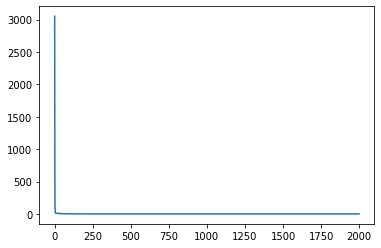

In [ ]:
x = torch.tensor([1, 2, 3]).float()
y = torch.tensor([3.1, 5, 7]).float()   # y = 2x + 1

w = - 50
b = 0
alpha = 0.1

costs = []
for i in range(2000) :
    d = ((w*x + b - y)*x).mean()    #cost/dw
    w = w - alpha * d                     

    d_b = ((w*x + b - y)).mean()    #cost/db
    b = b - alpha * d_b    

    cost =  ((w*x + b - y)**2).mean()
    costs.append(cost)
print(w, b ) 

plt.plot(costs)

# pytorch 기반 경사하강법

In [ ]:
x = torch.tensor([1,2,3,4,5.0], requires_grad=True)
y = (4*x+ 2)   #       4
y.backward( torch.ones_like(x)   )    #    y/dx
x.grad

tensor([4., 4., 4., 4., 4.])

In [ ]:
x = torch.tensor([1,2,3,4,5.0], requires_grad=True)
y = (4*x**2+  2*x + 5)      #   8x + 2
y.backward( torch.ones_like(x)   )    #    y/dx
print(x.grad)

tensor([10., 18., 26., 34., 42.])


In [ ]:
x = torch.tensor([1,2,3,4,5.0], requires_grad=True)
y = (4*x**2+  2*x + 5)      #   8x + 2
y.backward( torch.ones_like(x)   )    #    y/dx
print(x.grad)

In [ ]:
x = torch.tensor([1,2,3,4,5.0], requires_grad=True)
y = (4*x**2+  2*x + 5).sum()      #   8x + 2
y.backward() 
print(x.grad)

tensor([10., 18., 26., 34., 42.])


In [ ]:
x = torch.tensor([1,2,3,4,5.0], requires_grad=True)
y = (2*x + 4)               #2
z = (y * 4).sum()           #4
z.backward()     #       z/dx
x.grad

tensor([8., 8., 8., 8., 8.])

In [ ]:
x = torch.tensor([1,2,3,4,5.0], requires_grad=True)
y = (2*x**2 + 4) 
y.retain_grad()          
z = (y**2).sum()           
z.backward()     #       
print(x.grad)
print(y.grad)
# z/dx       =   2y*4x = 2(2*x**2 + 4)*4*x
# z/dy       =   2y = 2(2*x**2 + 4)
t = 2*(2*x**2 + 4) * 4 *x
print(t)

tensor([  48.,  192.,  528., 1152., 2160.])
tensor([ 12.,  24.,  44.,  72., 108.])
tensor([  48.,  192.,  528., 1152., 2160.], grad_fn=<MulBackward0>)


# pytorch 를 이용한 경사하강법

In [ ]:
# 데이터
x_train = torch.tensor([1, 2, 3]).float()
y_train = torch.tensor([2.1, 4.4, 6.1]).float()
#x_train = torch.tensor([[4.5, 2.1], [4,8, 2.7], [3.2, 1.7]])
#y_train = torch.tensor([[1700], [2000], [2100]])

# 모델 초기화
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([w, b], lr=0.1)  

epochs = 1000 # 원하는만큼 경사 하강법을 반복


for epoch in range(epochs):

    # H(x) 계산
    hypothesis = x_train * w + b

    # cost 계산
    #cost = torch.mean((hypothesis - y_train) ** 2)
    cost = F.mse_loss(hypothesis, y_train)    
    #cost_fn= nn.MSELoss()
    #cost = cost_fn(hypothesis, y_train)   
    
    
    # cost로 H(x) 개선
    optimizer.zero_grad()   #  미분값 0으로 초기화
    cost.backward()         # 미분값 계산 
    optimizer.step()        # 경사하강법 적용   w = w - lr * 미분값 

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, epochs , w.item(), b.item(), cost.item()
        ))

Epoch    0/1000 W: 1.947, b: 0.840 Cost: 20.326666
Epoch  100/1000 W: 1.979, b: 0.249 Cost: 0.020358
Epoch  200/1000 W: 1.998, b: 0.204 Cost: 0.020003
Epoch  300/1000 W: 2.000, b: 0.200 Cost: 0.020000
Epoch  400/1000 W: 2.000, b: 0.200 Cost: 0.020000
Epoch  500/1000 W: 2.000, b: 0.200 Cost: 0.020000
Epoch  600/1000 W: 2.000, b: 0.200 Cost: 0.020000
Epoch  700/1000 W: 2.000, b: 0.200 Cost: 0.020000
Epoch  800/1000 W: 2.000, b: 0.200 Cost: 0.020000
Epoch  900/1000 W: 2.000, b: 0.200 Cost: 0.020000


# 이항분포에서의 오차함수

In [ ]:
h = torch.tensor([0.0, 0.1, 0.9  ])
y = torch.tensor([1.0, 1.0, 1.0])
error = torch.abs(h - y)


error2 = -(y * torch.log(h+0.000000001) + (1-y)*torch.log(1-h+0.00000001))

print(error, error2, error.mean(), error2.mean())


tensor([1.0000, 0.9000, 0.1000]) tensor([20.7233,  2.3026,  0.1054]) tensor(0.6667) tensor(7.7104)


# 논리게이트 학습

In [ ]:
X = torch.tensor([[0,0],          # N x 2
              [0,1],
              [1,0],
              [1,1]]).float()

y = torch.tensor([[0], 
                  [0], 
                  [0],
                  [1]]).float()   # N x 1
                  
layer = torch.nn.Linear(2, 1)   # 2개 w, 1개 b 파라미미터 생성


#layer(X)  #  X*W + b
#w = torch.zeros(2, requires_grad=True)
#b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD(layer.parameters() , lr=0.1)

epochs = 5000
for epoch in range(epochs):
    
    hypothesis = torch.sigmoid(layer(X))      #   sigmoid(w1x1 + w2x2 + b)
    #cost = -torch.mean(y*torch.log(hypothesis)  + (1-y)*torch.log(1-hypothesis)   )    
    cost = F.binary_cross_entropy(hypothesis, y)    
    #cost_fn = nn.BCELoss()                  
    #cost = cost_fn(hypothesis, y)       
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')     

torch.sigmoid(layer(X))
#p = (torch.sigmoid(layer(X)) > 0.5).float()
#print(p)        

epoch = 1    cost=0.719728410243988
epoch = 101    cost=0.43056488037109375
epoch = 201    cost=0.3440062403678894
epoch = 301    cost=0.2888449728488922
epoch = 401    cost=0.2500797510147095
epoch = 501    cost=0.22100597620010376
epoch = 601    cost=0.19820992648601532
epoch = 701    cost=0.17976084351539612
epoch = 801    cost=0.16447359323501587
epoch = 901    cost=0.15157325565814972
epoch = 1001    cost=0.14052757620811462
epoch = 1101    cost=0.13095641136169434
epoch = 1201    cost=0.1225794106721878
epoch = 1301    cost=0.11518481373786926
epoch = 1401    cost=0.10860888659954071
epoch = 1501    cost=0.10272300243377686
epoch = 1601    cost=0.09742431342601776
epoch = 1701    cost=0.09262967109680176
epoch = 1801    cost=0.08827097713947296
epoch = 1901    cost=0.08429186046123505
epoch = 2001    cost=0.08064534515142441
epoch = 2101    cost=0.07729199528694153
epoch = 2201    cost=0.07419805228710175
epoch = 2301    cost=0.07133512198925018
epoch = 2401    cost=0.06867845356

tensor([[9.9896e-05],
        [3.9598e-02],
        [3.9598e-02],
        [9.4449e-01]], grad_fn=<SigmoidBackward>)

# 당뇨병 진단 시스템

In [ ]:
data = np.loadtxt("diabetes.csv", delimiter=",", dtype=np.float32)
print(data.shape)

X = data[:, 0:8] 
y = data[:, 8]


X = torch.tensor(X).float()
y = torch.tensor(y).float().reshape(-1,1)

print(X.shape)
print(y.shape)

(768, 9)
torch.Size([768, 8])
torch.Size([768, 1])


In [ ]:
layer = torch.nn.Linear(8, 1)
optimizer = optim.Adam(layer.parameters() , lr=0.001)

epochs = 30000
for epoch in range(epochs):    
    hypothesis = torch.sigmoid(layer(X))   
    cost = F.binary_cross_entropy(hypothesis, y)    
                  
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 3000 == 0:
        print(f'epoch = {epoch+1}    cost={cost.item()}')     
    

epoch = 1    cost=63.722660064697266
epoch = 3001    cost=0.5425285696983337
epoch = 6001    cost=0.49575698375701904
epoch = 9001    cost=0.47587934136390686
epoch = 12001    cost=0.4712047278881073
epoch = 15001    cost=0.4709932506084442
epoch = 18001    cost=0.4709930717945099
epoch = 21001    cost=0.4709930717945099
epoch = 24001    cost=0.4709930717945099
epoch = 27001    cost=0.47101855278015137


In [ ]:
p = (torch.sigmoid(layer(X)) > 0.5).float()
accuracy = (p == y).float().mean()
print(accuracy)

tensor(0.7826)
